In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/political-polarization-in-us-congress/Political Polarization in US Congress (Assorted).csv
/kaggle/input/political-polarization-in-us-congress/Political Polarization in US Congress (Non-Assorted).csv
/kaggle/input/political-polarization-in-us-congress/US History All House and Senate Members.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
df1 = pd.read_csv("/kaggle/input/political-polarization-in-us-congress/Political Polarization in US Congress (Assorted).csv")
df2 = pd.read_csv("/kaggle/input/political-polarization-in-us-congress/Political Polarization in US Congress (Non-Assorted).csv")
df3 = pd.read_csv("/kaggle/input/political-polarization-in-us-congress/US History All House and Senate Members.csv")

In [4]:
df1.head(5)

chamber  congress  year  party.mean.diff.d1  prop.moderate.d1  \
0   House        46  1879            0.785883          0.130435   
1  Senate        46  1879            0.747943          0.160494   
2   House        47  1881            0.782714          0.100324   
3  Senate        47  1881            0.763571          0.141176   
4   House        48  1883            0.724404          0.216374   

   prop.moderate.dem.d1  prop.moderate.rep.d1  overlap  chamber.mean.d1  \
0              0.110345              0.066667      0.0        -0.018943   
1              0.000000              0.342857      0.0        -0.124568   
2              0.110294              0.025157      0.0         0.026343   
3              0.000000              0.244444      0.0        -0.030047   
4              0.275862              0.096000      0.0        -0.066354   

   chamber.mean.d2  ...  rep.mean.d1  rep.mean.d2  north.rep.mean.d1  \
0        -0.043084  ...     0.394896    -0.128074           0.398015   
1        -0.077630  ...     0.295343    -0.027171           0.296303   
2        -0.025706  ...     0.387736    -0.050755           0.391087   
3        -0.080929  ...     0.314756    -0.113044           0.316341   
4        -0.029848  ...     0.377488     0.001824           0.384009   

   north.rep.mean.d2  south.rep.mean.d1  south.rep.mean.d2  north.dem.mean.d1  \
0          -0.127235           0.257667          -0.165000          -0.343253   
1          -0.079273           0.279500           0.832500          -0.455136   
2          -0.042993           0.331889          -0.180111          -0.332643   
3          -0.132182           0.245000           0.729000          -0.455118   
4           0.009155           0.293444          -0.092667          -0.281450   

   north.dem.mean.d2  south.dem.mean.d1  south.dem.mean.d2  
0          -0.063924          -0.448121          -0.031894  
1          -0.263591          -0.450174           0.023696  
2          -0.058429          -0.461091          -0.078530  
3          -0.199059          -0.443714           0.065667  
4          -0.008705          -0.461041          -0.129784  

[5 rows x 22 columns]

In [5]:
df1.columns

Index(['chamber', 'congress', 'year', 'party.mean.diff.d1', 'prop.moderate.d1',
       'prop.moderate.dem.d1', 'prop.moderate.rep.d1', 'overlap',
       'chamber.mean.d1', 'chamber.mean.d2', 'dem.mean.d1', 'dem.mean.d2',
       'rep.mean.d1', 'rep.mean.d2', 'north.rep.mean.d1', 'north.rep.mean.d2',
       'south.rep.mean.d1', 'south.rep.mean.d2', 'north.dem.mean.d1',
       'north.dem.mean.d2', 'south.dem.mean.d1', 'south.dem.mean.d2'],
      dtype='object')

In [6]:
len(df1.columns)

22

In [7]:
df2.head(5)

chamber  congress  year  party.mean.diff.d1  prop.moderate.d1  \
0   House        46  1879            0.785883          0.130435   
1   House        47  1881            0.782714          0.100324   
2   House        48  1883            0.724404          0.216374   
3   House        49  1885            0.749321          0.147590   
4   House        50  1887            0.764893          0.161094   

   prop.moderate.dem.d1  prop.moderate.rep.d1   overlap  chamber.mean.d1  \
0              0.110345              0.066667  0.000000        -0.018943   
1              0.110294              0.025157  0.000000         0.026343   
2              0.275862              0.096000  0.000000        -0.066354   
3              0.181818              0.090909  0.006061        -0.041533   
4              0.205882              0.091503  0.009288        -0.006875   

   chamber.mean.d2  ...  rep.mean.d1  rep.mean.d2  north.rep.mean.d1  \
0        -0.043084  ...     0.394896    -0.128074           0.398015   
1        -0.025706  ...     0.387736    -0.050755           0.391087   
2        -0.029848  ...     0.377488     0.001824           0.384009   
3        -0.029319  ...     0.383615     0.053343           0.388635   
4        -0.065960  ...     0.394641     0.046895           0.393476   

   north.rep.mean.d2  south.rep.mean.d1  south.rep.mean.d2  north.dem.mean.d1  \
0          -0.127235           0.257667          -0.165000          -0.343253   
1          -0.042993           0.331889          -0.180111          -0.332643   
2           0.009155           0.293444          -0.092667          -0.281450   
3           0.060036           0.269000          -0.099500          -0.295877   
4           0.066028           0.411300          -0.226700          -0.300319   

   north.dem.mean.d2  south.dem.mean.d1  south.dem.mean.d2  
0          -0.063924          -0.448121          -0.031894  
1          -0.058429          -0.461091          -0.078530  
2          -0.008705          -0.461041          -0.129784  
3          -0.088755          -0.457086          -0.098580  
4          -0.210479          -0.456750          -0.177237  

[5 rows x 22 columns]

In [8]:
df2.columns

Index(['chamber', 'congress', 'year', 'party.mean.diff.d1', 'prop.moderate.d1',
       'prop.moderate.dem.d1', 'prop.moderate.rep.d1', 'overlap',
       'chamber.mean.d1', 'chamber.mean.d2', 'dem.mean.d1', 'dem.mean.d2',
       'rep.mean.d1', 'rep.mean.d2', 'north.rep.mean.d1', 'north.rep.mean.d2',
       'south.rep.mean.d1', 'south.rep.mean.d2', 'north.dem.mean.d1',
       'north.dem.mean.d2', 'south.dem.mean.d1', 'south.dem.mean.d2'],
      dtype='object')

In [9]:
len(df2.columns)

22

In [10]:
df3.head(5)

congress    chamber  icpsr  state_icpsr  district_code state_abbrev  \
0         1  President  99869           99              0          USA   
1         1      House    379           44              2           GA   
2         1      House   4854           44              1           GA   
3         1      House   6071           44              3           GA   
4         1      House   1538           52              6           MD   

   party_code  occupancy  last_means             bioname  ...    died  \
0        5000        NaN         NaN  WASHINGTON, George  ...     NaN   
1        4000        0.0         1.0    BALDWIN, Abraham  ...  1807.0   
2        4000        0.0         1.0      JACKSON, James  ...  1806.0   
3        4000        0.0         1.0     MATHEWS, George  ...  1812.0   
4        5000        0.0         1.0     CARROLL, Daniel  ...  1796.0   

   nominate_dim1  nominate_dim2  nominate_log_likelihood  \
0            NaN            NaN                      NaN   
1         -0.165         -0.373                -28.55029   
2         -0.320         -0.181                -24.89986   
3         -0.428         -0.317                -12.62728   
4          0.116         -0.740                -23.47008   

   nominate_geo_mean_probability  nominate_number_of_votes  \
0                            NaN                       NaN   
1                          0.758                     103.0   
2                          0.776                      98.0   
3                          0.880                      99.0   
4                          0.783                      96.0   

   nominate_number_of_errors  conditional  nokken_poole_dim1  \
0                        NaN          NaN                NaN   
1                       12.0          NaN             -0.429   
2                        9.0          NaN             -0.559   
3                        2.0          NaN             -0.413   
4                       11.0          NaN              0.114   

   nokken_poole_dim2  
0                NaN  
1             -0.817  
2             -0.052  
3             -0.232  
4             -0.779  

[5 rows x 22 columns]

In [11]:
df3.columns

Index(['congress', 'chamber', 'icpsr', 'state_icpsr', 'district_code',
       'state_abbrev', 'party_code', 'occupancy', 'last_means', 'bioname',
       'bioguide_id', 'born', 'died', 'nominate_dim1', 'nominate_dim2',
       'nominate_log_likelihood', 'nominate_geo_mean_probability',
       'nominate_number_of_votes', 'nominate_number_of_errors', 'conditional',
       'nokken_poole_dim1', 'nokken_poole_dim2'],
      dtype='object')

In [12]:
len(df3.columns)

22

# First Dataframe: 
**Political Polarization in US Congress (Assorted)**

In [13]:
df1.dtypes

chamber                  object
congress                  int64
year                      int64
party.mean.diff.d1      float64
prop.moderate.d1        float64
prop.moderate.dem.d1    float64
prop.moderate.rep.d1    float64
overlap                 float64
chamber.mean.d1         float64
chamber.mean.d2         float64
dem.mean.d1             float64
dem.mean.d2             float64
rep.mean.d1             float64
rep.mean.d2             float64
north.rep.mean.d1       float64
north.rep.mean.d2       float64
south.rep.mean.d1       float64
south.rep.mean.d2       float64
north.dem.mean.d1       float64
north.dem.mean.d2       float64
south.dem.mean.d1       float64
south.dem.mean.d2       float64
dtype: object

In [14]:
df1.describe()

congress        year  party.mean.diff.d1  prop.moderate.d1  \
count  144.000000   144.00000          144.000000        144.000000   
mean    81.500000  1950.00000            0.672746          0.280360   
std     20.855145    41.71029            0.113234          0.140807   
min     46.000000  1879.00000            0.471811          0.037783   
25%     63.750000  1914.50000            0.569576          0.156149   
50%     81.500000  1950.00000            0.671799          0.273317   
75%     99.250000  1985.50000            0.774144          0.400225   
max    117.000000  2021.00000            0.885473          0.553398   

       prop.moderate.dem.d1  prop.moderate.rep.d1     overlap  \
count            144.000000            144.000000  144.000000   
mean               0.308254              0.243466    0.111915   
std                0.156800              0.167268    0.154972   
min                0.000000              0.004673    0.000000   
25%                0.186080              0.083333    0.000000   
50%                0.303225              0.218466    0.012635   
75%                0.432051              0.403986    0.205145   
max                0.638298              0.539683    0.641204   

       chamber.mean.d1  chamber.mean.d2  dem.mean.d1  ...  rep.mean.d1  \
count       144.000000       144.000000   144.000000  ...   144.000000   
mean          0.006729         0.007046    -0.317053  ...     0.355693   
std           0.076446         0.093656     0.060724  ...     0.072949   
min          -0.139102        -0.178731    -0.458838  ...     0.233222   
25%          -0.058487        -0.063020    -0.362034  ...     0.288130   
50%           0.005858        -0.002157    -0.307918  ...     0.359087   
75%           0.066125         0.073850    -0.280840  ...     0.412136   
max           0.178277         0.238621    -0.191532  ...     0.524745   

       rep.mean.d2  north.rep.mean.d1  north.rep.mean.d2  south.rep.mean.d1  \
count   144.000000         144.000000         144.000000         125.000000   
mean     -0.128920           0.346758          -0.160260           0.381850   
std       0.147708           0.070523           0.168044           0.103511   
min      -0.458756           0.226692          -0.510281           0.011000   
25%      -0.234815           0.284189          -0.274835           0.298143   
50%      -0.129548           0.333559          -0.163742           0.397538   
75%       0.001834           0.409034          -0.007139           0.448651   
max       0.172600           0.501633           0.172600           0.642000   

       south.rep.mean.d2  north.dem.mean.d1  north.dem.mean.d2  \
count         125.000000         144.000000         144.000000   
mean            0.068322          -0.332299          -0.040109   
std             0.194680           0.062254           0.131607   
min            -0.408000          -0.455136          -0.347722   
25%            -0.018250          -0.377365          -0.117304   
50%             0.092222          -0.339075          -0.057375   
75%             0.170000          -0.294201           0.066315   
max             0.832500          -0.152476           0.245293   

       south.dem.mean.d1  south.dem.mean.d2  
count         144.000000         144.000000  
mean           -0.267668           0.351201  
std             0.120392           0.359075  
min            -0.475038          -0.308346  
25%            -0.380214           0.015566  
50%            -0.224500           0.350417  
75%            -0.162922           0.713521  
max            -0.085818           0.856279  

[8 rows x 21 columns]

In [15]:
df1.dtypes

chamber                  object
congress                  int64
year                      int64
party.mean.diff.d1      float64
prop.moderate.d1        float64
prop.moderate.dem.d1    float64
prop.moderate.rep.d1    float64
overlap                 float64
chamber.mean.d1         float64
chamber.mean.d2         float64
dem.mean.d1             float64
dem.mean.d2             float64
rep.mean.d1             float64
rep.mean.d2             float64
north.rep.mean.d1       float64
north.rep.mean.d2       float64
south.rep.mean.d1       float64
south.rep.mean.d2       float64
north.dem.mean.d1       float64
north.dem.mean.d2       float64
south.dem.mean.d1       float64
south.dem.mean.d2       float64
dtype: object

In [16]:
df1_description = df1.describe()
df1_description

congress        year  party.mean.diff.d1  prop.moderate.d1  \
count  144.000000   144.00000          144.000000        144.000000   
mean    81.500000  1950.00000            0.672746          0.280360   
std     20.855145    41.71029            0.113234          0.140807   
min     46.000000  1879.00000            0.471811          0.037783   
25%     63.750000  1914.50000            0.569576          0.156149   
50%     81.500000  1950.00000            0.671799          0.273317   
75%     99.250000  1985.50000            0.774144          0.400225   
max    117.000000  2021.00000            0.885473          0.553398   

       prop.moderate.dem.d1  prop.moderate.rep.d1     overlap  \
count            144.000000            144.000000  144.000000   
mean               0.308254              0.243466    0.111915   
std                0.156800              0.167268    0.154972   
min                0.000000              0.004673    0.000000   
25%                0.186080              0.083333    0.000000   
50%                0.303225              0.218466    0.012635   
75%                0.432051              0.403986    0.205145   
max                0.638298              0.539683    0.641204   

       chamber.mean.d1  chamber.mean.d2  dem.mean.d1  ...  rep.mean.d1  \
count       144.000000       144.000000   144.000000  ...   144.000000   
mean          0.006729         0.007046    -0.317053  ...     0.355693   
std           0.076446         0.093656     0.060724  ...     0.072949   
min          -0.139102        -0.178731    -0.458838  ...     0.233222   
25%          -0.058487        -0.063020    -0.362034  ...     0.288130   
50%           0.005858        -0.002157    -0.307918  ...     0.359087   
75%           0.066125         0.073850    -0.280840  ...     0.412136   
max           0.178277         0.238621    -0.191532  ...     0.524745   

       rep.mean.d2  north.rep.mean.d1  north.rep.mean.d2  south.rep.mean.d1  \
count   144.000000         144.000000         144.000000         125.000000   
mean     -0.128920           0.346758          -0.160260           0.381850   
std       0.147708           0.070523           0.168044           0.103511   
min      -0.458756           0.226692          -0.510281           0.011000   
25%      -0.234815           0.284189          -0.274835           0.298143   
50%      -0.129548           0.333559          -0.163742           0.397538   
75%       0.001834           0.409034          -0.007139           0.448651   
max       0.172600           0.501633           0.172600           0.642000   

       south.rep.mean.d2  north.dem.mean.d1  north.dem.mean.d2  \
count         125.000000         144.000000         144.000000   
mean            0.068322          -0.332299          -0.040109   
std             0.194680           0.062254           0.131607   
min            -0.408000          -0.455136          -0.347722   
25%            -0.018250          -0.377365          -0.117304   
50%             0.092222          -0.339075          -0.057375   
75%             0.170000          -0.294201           0.066315   
max             0.832500          -0.152476           0.245293   

       south.dem.mean.d1  south.dem.mean.d2  
count         144.000000         144.000000  
mean           -0.267668           0.351201  
std             0.120392           0.359075  
min            -0.475038          -0.308346  
25%            -0.380214           0.015566  
50%            -0.224500           0.350417  
75%            -0.162922           0.713521  
max            -0.085818           0.856279  

[8 rows x 21 columns]

In [17]:
df1.isnull().sum()

chamber                  0
congress                 0
year                     0
party.mean.diff.d1       0
prop.moderate.d1         0
prop.moderate.dem.d1     0
prop.moderate.rep.d1     0
overlap                  0
chamber.mean.d1          0
chamber.mean.d2          0
dem.mean.d1              0
dem.mean.d2              0
rep.mean.d1              0
rep.mean.d2              0
north.rep.mean.d1        0
north.rep.mean.d2        0
south.rep.mean.d1       19
south.rep.mean.d2       19
north.dem.mean.d1        0
north.dem.mean.d2        0
south.dem.mean.d1        0
south.dem.mean.d2        0
dtype: int64

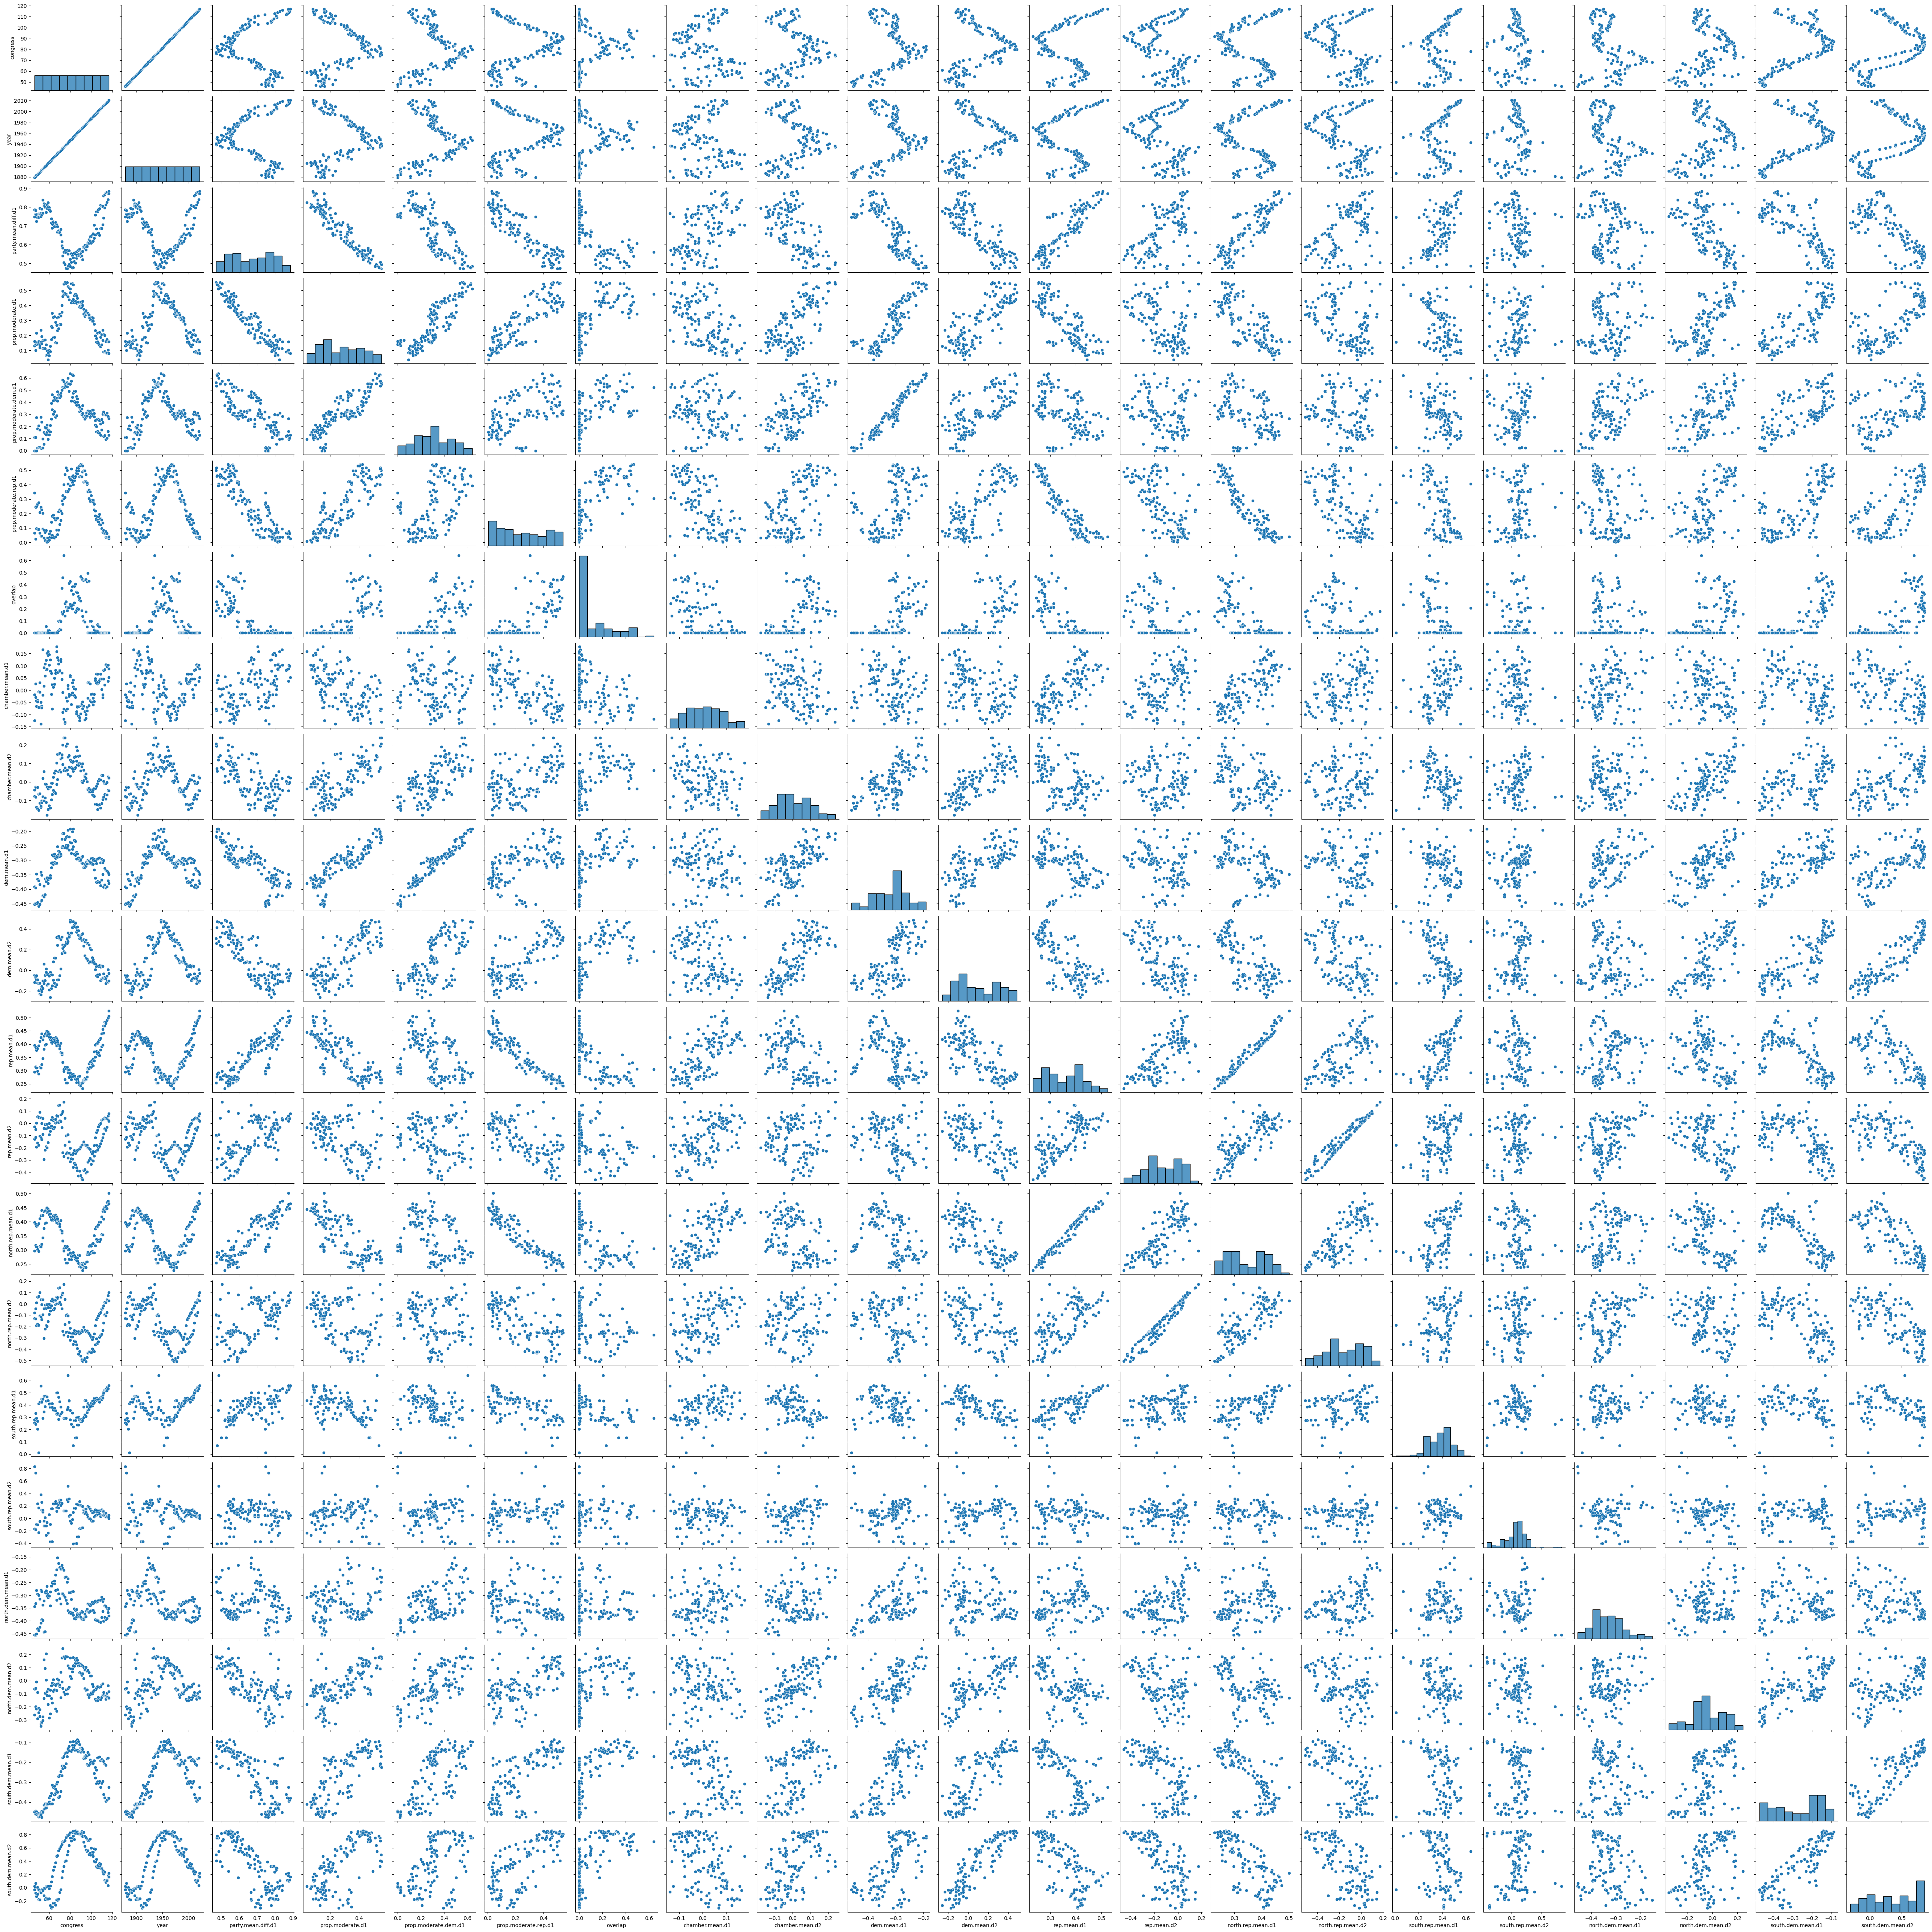

In [18]:
sns.pairplot(df1)
plt.savefig('my_image.png')

In [23]:
%%capture cap --no-stderr
print(df1.describe())

with open("output.txt", "w") as f:
    f.write(cap.stdout)

<AxesSubplot:>

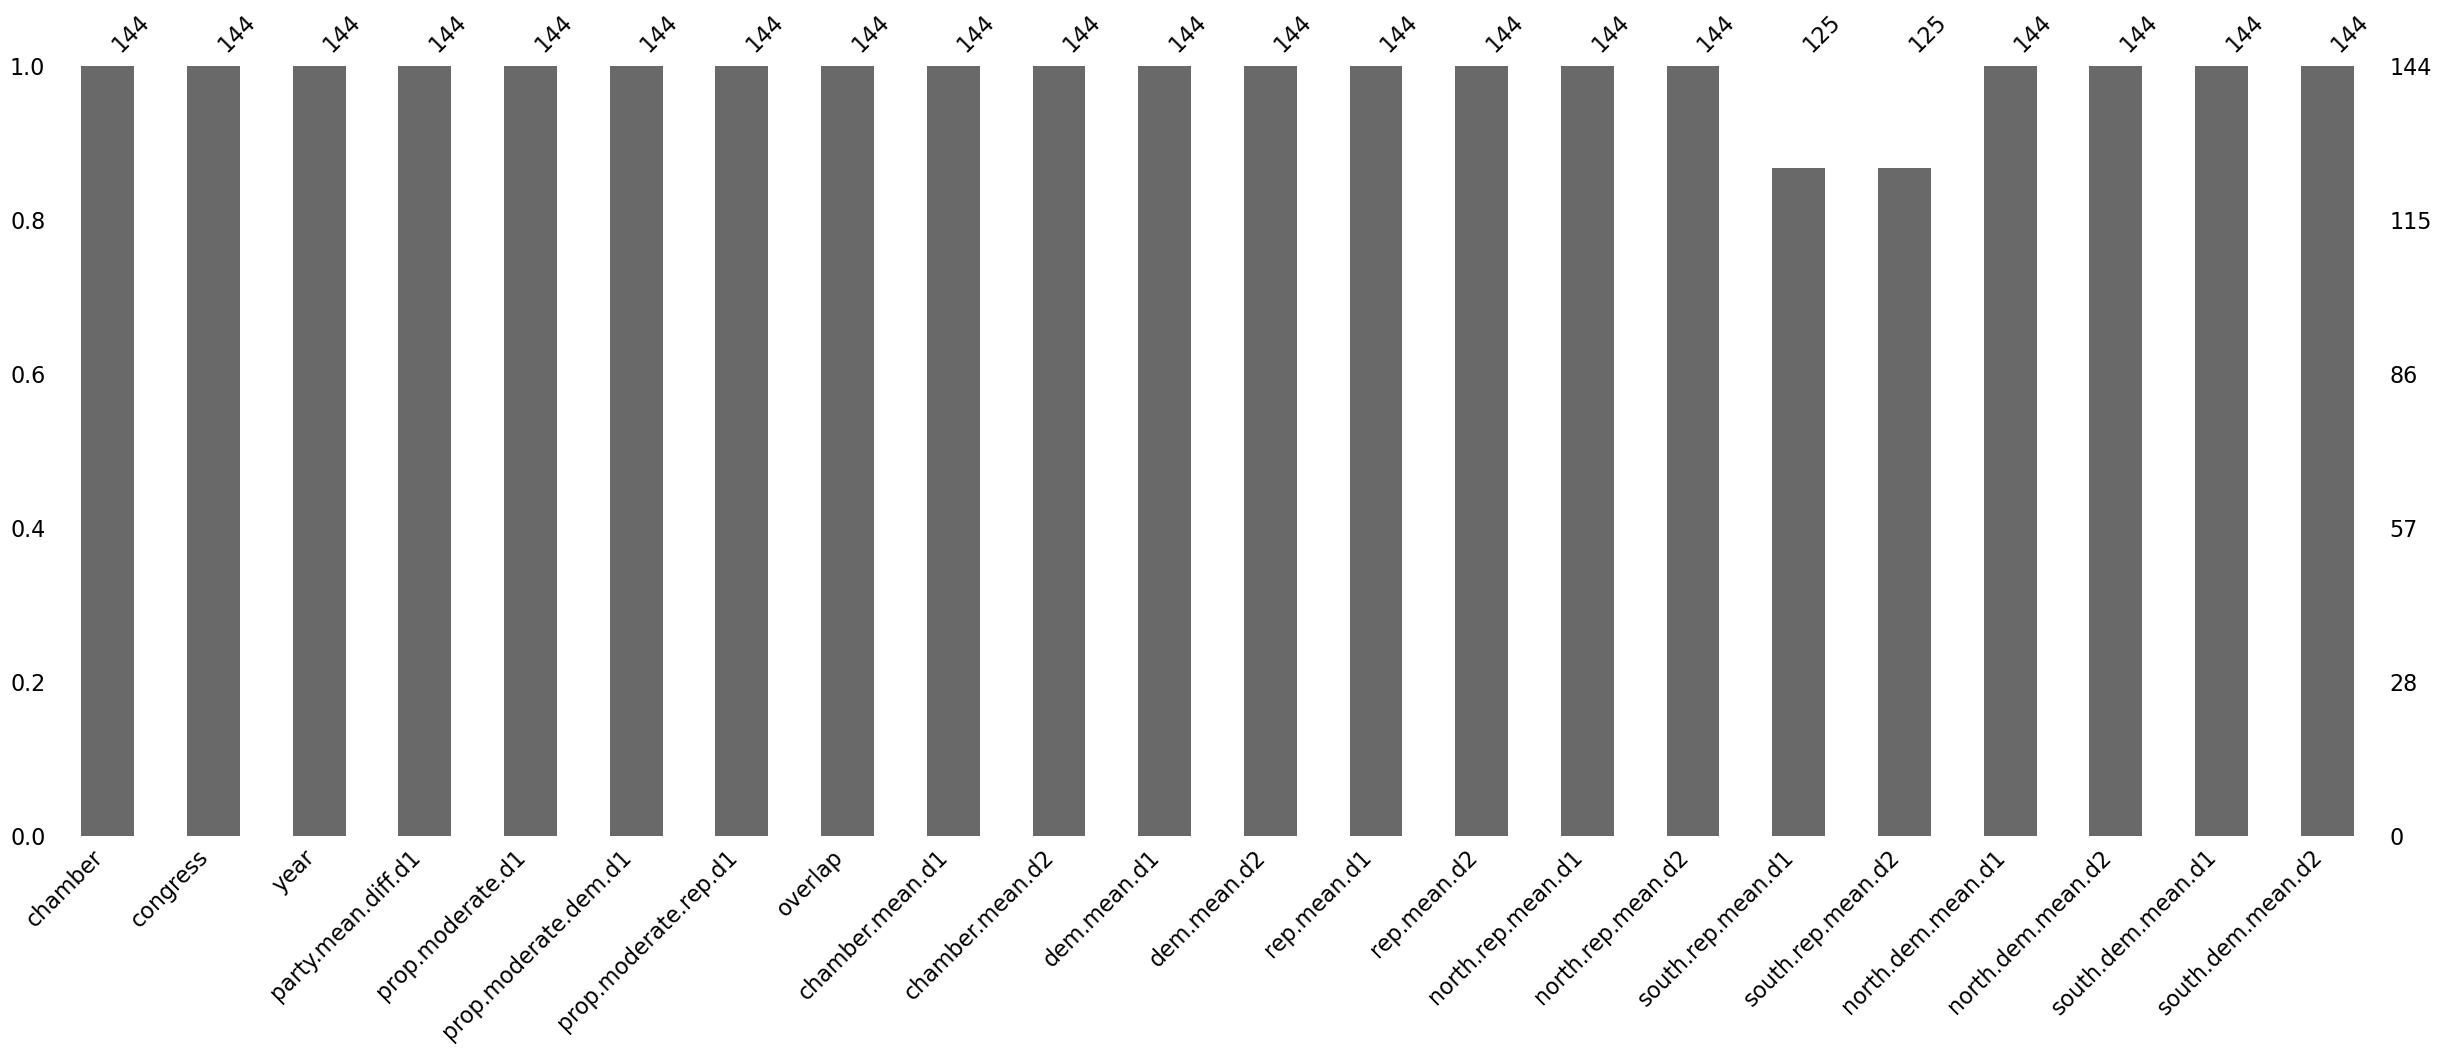

In [24]:
msno.bar(df1, figsize = (30,10))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='year', ylabel='Density'>

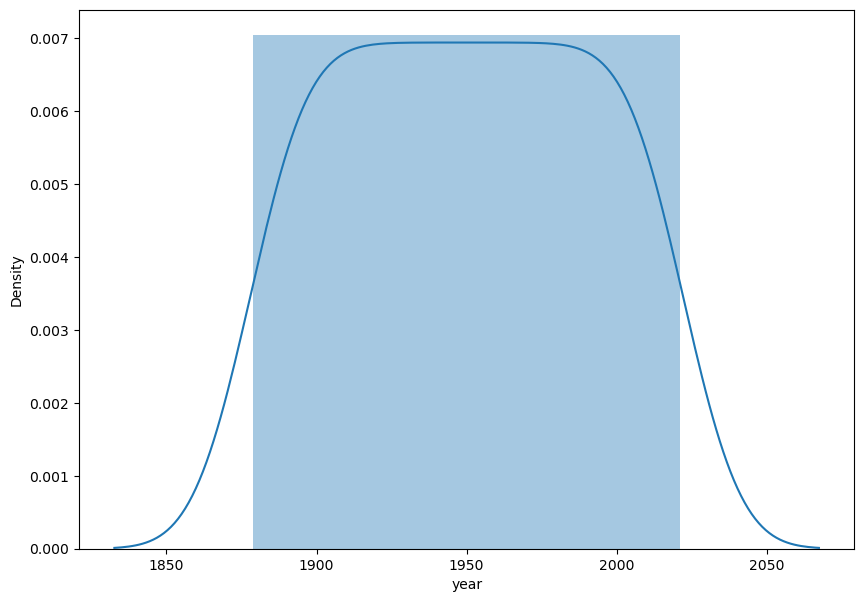

In [25]:
fig, ax = plt.subplots(figsize =(10, 7))
sns.distplot(df1.year)  

In [30]:
print("The number of unique values within each column: " + "\n \n" + str(df1.nunique()))

The number of unique values within each column: 
 
chamber                   2
congress                 72
year                     72
party.mean.diff.d1      144
prop.moderate.d1        138
prop.moderate.dem.d1    139
prop.moderate.rep.d1    132
overlap                  79
chamber.mean.d1         144
chamber.mean.d2         144
dem.mean.d1             144
dem.mean.d2             144
rep.mean.d1             144
rep.mean.d2             144
north.rep.mean.d1       144
north.rep.mean.d2       144
south.rep.mean.d1       108
south.rep.mean.d2       108
north.dem.mean.d1       144
north.dem.mean.d2       144
south.dem.mean.d1       141
south.dem.mean.d2       141
dtype: int64


In [35]:
"""
# Splitting the variables into numerical and categorical:
num_df = df1["year", ""]
"""

'\n# Splitting the variables into numerical and categorical:\nnum_df = df1["year", ""]\n'

##   Chamber Variable:

![chamber](https://i.postimg.cc/SRFGWwrb/Chamber.jpg)

## the Legislative Branch consists of the House of Representatives and the Senate, which together form the United States Congress.

In [36]:
df1.columns

Index(['chamber', 'congress', 'year', 'party.mean.diff.d1', 'prop.moderate.d1',
       'prop.moderate.dem.d1', 'prop.moderate.rep.d1', 'overlap',
       'chamber.mean.d1', 'chamber.mean.d2', 'dem.mean.d1', 'dem.mean.d2',
       'rep.mean.d1', 'rep.mean.d2', 'north.rep.mean.d1', 'north.rep.mean.d2',
       'south.rep.mean.d1', 'south.rep.mean.d2', 'north.dem.mean.d1',
       'north.dem.mean.d2', 'south.dem.mean.d1', 'south.dem.mean.d2'],
      dtype='object')

## Overlapping Data

In [95]:
df1["overlap"].describe()

count    144.000000
mean       0.111915
std        0.154972
min        0.000000
25%        0.000000
50%        0.012635
75%        0.205145
max        0.641204
Name: overlap, dtype: float64

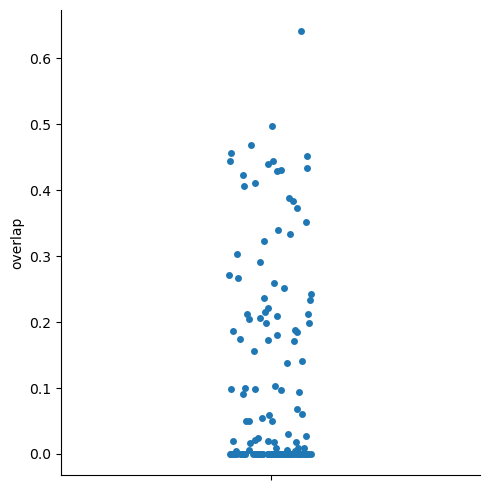

In [96]:
sns.catplot(df1.overlap)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3188dce490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3188dc6f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3188dc6490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31780d1550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3189be3d90>],
 'means': []}

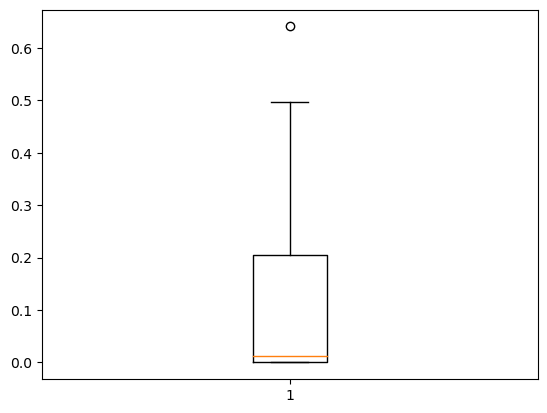

In [97]:
plt.boxplot(df1.overlap)

In [101]:
chamber_df = [df1["year"], df1["chamber"], df1["chamber.mean.d1"], df1["chamber.mean.d2"]]
chamber_df = pd.DataFrame(chamber_df)
chamber_df

0         1         2         3         4         5    \
year                 1879      1879      1881      1881      1883      1883   
chamber             House    Senate     House    Senate     House    Senate   
chamber.mean.d1 -0.018943 -0.124568  0.026343 -0.030047 -0.066354 -0.042705   
chamber.mean.d2 -0.043084  -0.07763 -0.025706 -0.080929 -0.029848 -0.135128   

                      6         7         8         9    ...       134  \
year                 1885      1885      1887      1887  ...      2013   
chamber             House    Senate     House    Senate  ...     House   
chamber.mean.d1 -0.041533  -0.04731 -0.006875 -0.070571  ...  0.084622   
chamber.mean.d2 -0.029319 -0.143345  -0.06596  -0.15187  ... -0.008453   

                      135       136      137       138       139       140  \
year                 2013      2015     2015      2017      2017      2019   
chamber            Senate     House   Senate     House    Senate     House   
chamber.mean.d1  0.021457  0.103687  0.10415  0.098696  0.096114   0.03721   
chamber.mean.d2 -0.067619 -0.009048 -0.09181  -0.00244 -0.069962  0.028898   

                      141       142       143  
year                 2019      2021      2021  
chamber            Senate     House    Senate  
chamber.mean.d1  0.102735  0.052652  0.088147  
chamber.mean.d2 -0.044157  0.022725 -0.047696  

[4 rows x 144 columns]

In [103]:
demrep_df = [df1["year"], df1["chamber"], df1["dem.mean.d1"], df1["dem.mean.d2"], df1["rep.mean.d1"], df1["rep.mean.d2"]]
demrep_df = pd.DataFrame(demrep_df)
demrep_df

0         1         2         3         4         5    \
year             1879      1879      1881      1881      1883      1883   
chamber         House    Senate     House    Senate     House    Senate   
dem.mean.d1 -0.390986   -0.4526 -0.394978 -0.448816 -0.346916 -0.449444   
dem.mean.d2 -0.049345 -0.116756 -0.068184 -0.052763 -0.052842 -0.091667   
rep.mean.d1  0.394896  0.295343  0.387736  0.314756  0.377488  0.311025   
rep.mean.d2 -0.128074 -0.027171 -0.050755 -0.113044  0.001824 -0.192675   

                  6         7         8         9    ...       134       135  \
year             1885      1885      1887      1887  ...      2013      2013   
chamber         House    Senate     House    Senate  ...     House    Senate   
dem.mean.d1 -0.365706 -0.445821 -0.370253 -0.458838  ... -0.384324 -0.327298   
dem.mean.d2 -0.093011 -0.125667 -0.195618 -0.123081  ... -0.070799 -0.079123   
rep.mean.d1  0.383615  0.298067  0.394641  0.288575  ...  0.483225  0.469565   
rep.mean.d2  0.053343 -0.158667  0.046895   -0.1785  ...  0.044542 -0.042891   

                  136       137       138       139       140       141  \
year             2015      2015      2017      2017      2019      2019   
chamber         House    Senate     House    Senate     House    Senate   
dem.mean.d1 -0.395042 -0.334659 -0.390865 -0.336396 -0.370534 -0.342326   
dem.mean.d2 -0.077816 -0.127409 -0.055435 -0.105479  0.005924 -0.114761   
rep.mean.d1  0.481211  0.478352  0.490344  0.489636  0.502772  0.498463   
rep.mean.d2  0.043008 -0.054778  0.039956 -0.030291  0.059888  0.025778   

                  142       143  
year             2021      2021  
chamber         House    Senate  
dem.mean.d1 -0.380022 -0.348571  
dem.mean.d2 -0.030209 -0.103531  
rep.mean.d1  0.505451  0.524745  
rep.mean.d2  0.078121  0.016176  

[6 rows x 144 columns]

In [105]:
geodist = [df1["year"], df1["chamber"], df1["north.rep.mean.d1"], df1["north.rep.mean.d2"], df1['south.rep.mean.d1'], df1["south.rep.mean.d2"], df1["north.dem.mean.d1"], df1["north.dem.mean.d2"], df1["south.dem.mean.d1"], df1["south.dem.mean.d2"]]
geodist_df = pd.DataFrame(geodist)
geodist_df

0         1         2         3         4         5    \
year                   1879      1879      1881      1881      1883      1883   
chamber               House    Senate     House    Senate     House    Senate   
north.rep.mean.d1  0.398015  0.296303  0.391087  0.316341  0.384009  0.311025   
north.rep.mean.d2 -0.127235 -0.079273 -0.042993 -0.132182  0.009155 -0.192675   
south.rep.mean.d1  0.257667    0.2795  0.331889     0.245  0.293444       NaN   
south.rep.mean.d2    -0.165    0.8325 -0.180111     0.729 -0.092667       NaN   
north.dem.mean.d1 -0.343253 -0.455136 -0.332643 -0.455118  -0.28145   -0.4515   
north.dem.mean.d2 -0.063924 -0.263591 -0.058429 -0.199059 -0.008705    -0.217   
south.dem.mean.d1 -0.448121 -0.450174 -0.461091 -0.443714 -0.461041   -0.4478   
south.dem.mean.d2 -0.031894  0.023696  -0.07853  0.065667 -0.129784    0.0086   

                        6         7         8         9    ...       134  \
year                   1885      1885      1887      1887  ...      2013   
chamber               House    Senate     House    Senate  ...     House   
north.rep.mean.d1  0.388635  0.302442  0.393476  0.295692  ...  0.452433   
north.rep.mean.d2  0.060036 -0.176907  0.066028 -0.187462  ...  0.013679   
south.rep.mean.d1     0.269     0.204    0.4113     0.011  ...  0.522151   
south.rep.mean.d2   -0.0995    0.2335   -0.2267     0.171  ...  0.083557   
north.dem.mean.d1 -0.295877 -0.430412 -0.300319 -0.437812  ... -0.385799   
north.dem.mean.d2 -0.088755 -0.292353 -0.210479 -0.243812  ... -0.115634   
south.dem.mean.d1 -0.457086 -0.457727  -0.45675 -0.474857  ... -0.378275   
south.dem.mean.d2  -0.09858  0.003136 -0.177237 -0.031095  ...  0.113025   

                        135       136       137       138       139       140  \
year                   2013      2015      2015      2017      2017      2019   
chamber              Senate     House    Senate     House    Senate     House   
north.rep.mean.d1  0.436464  0.446331  0.454667  0.447701   0.46925  0.461301   
north.rep.mean.d2 -0.096286  0.011628 -0.106545  0.036847 -0.077031  0.073398   
south.rep.mean.d1  0.521056  0.528925  0.515571  0.548274     0.518  0.553161   
south.rep.mean.d2  0.040167  0.085934  0.026571  0.044179  0.034739  0.043473   
north.dem.mean.d1 -0.341412 -0.394961 -0.343537 -0.391198 -0.350432 -0.367995   
north.dem.mean.d2  -0.11649 -0.119747 -0.142659 -0.095549 -0.124841 -0.038569   
south.dem.mean.d1 -0.207333 -0.395389 -0.213333 -0.389447    -0.182 -0.380479   
south.dem.mean.d2    0.2385  0.101556     0.081  0.115579    0.1075  0.180188   

                        141       142       143  
year                   2019      2021      2021  
chamber              Senate     House    Senate  
north.rep.mean.d1   0.47425  0.464496  0.501633  
north.rep.mean.d2  0.034875  0.101066  0.027167  
south.rep.mean.d1  0.533682   0.55817  0.557762  
south.rep.mean.d2  0.012545  0.048585  0.000476  
north.dem.mean.d1 -0.353767 -0.379994 -0.350644  
north.dem.mean.d2  -0.12493  -0.08278 -0.131978  
south.dem.mean.d1 -0.178333 -0.380125  -0.32525  
south.dem.mean.d2     0.031  0.163646    0.2165  

[10 rows x 144 columns]

In [98]:
south_mean = [df1["year"], df1["south.rep.mean.d1"], df1["south.rep.mean.d2"], df1["south.dem.mean.d1"], df1["south.dem.mean.d2"]]
south_mean = pd.DataFrame(south_mean)
south_mean

0            1            2            3    \
year               1879.000000  1879.000000  1881.000000  1881.000000   
south.rep.mean.d1     0.257667     0.279500     0.331889     0.245000   
south.rep.mean.d2    -0.165000     0.832500    -0.180111     0.729000   
south.dem.mean.d1    -0.448121    -0.450174    -0.461091    -0.443714   
south.dem.mean.d2    -0.031894     0.023696    -0.078530     0.065667   

                           4          5            6            7    \
year               1883.000000  1883.0000  1885.000000  1885.000000   
south.rep.mean.d1     0.293444        NaN     0.269000     0.204000   
south.rep.mean.d2    -0.092667        NaN    -0.099500     0.233500   
south.dem.mean.d1    -0.461041    -0.4478    -0.457086    -0.457727   
south.dem.mean.d2    -0.129784     0.0086    -0.098580     0.003136   

                           8            9    ...          134          135  \
year               1887.000000  1887.000000  ...  2013.000000  2013.000000   
south.rep.mean.d1     0.411300     0.011000  ...     0.522151     0.521056   
south.rep.mean.d2    -0.226700     0.171000  ...     0.083557     0.040167   
south.dem.mean.d1    -0.456750    -0.474857  ...    -0.378275    -0.207333   
south.dem.mean.d2    -0.177237    -0.031095  ...     0.113025     0.238500   

                           136          137          138          139  \
year               2015.000000  2015.000000  2017.000000  2017.000000   
south.rep.mean.d1     0.528925     0.515571     0.548274     0.518000   
south.rep.mean.d2     0.085934     0.026571     0.044179     0.034739   
south.dem.mean.d1    -0.395389    -0.213333    -0.389447    -0.182000   
south.dem.mean.d2     0.101556     0.081000     0.115579     0.107500   

                           140          141          142          143  
year               2019.000000  2019.000000  2021.000000  2021.000000  
south.rep.mean.d1     0.553161     0.533682     0.558170     0.557762  
south.rep.mean.d2     0.043473     0.012545     0.048585     0.000476  
south.dem.mean.d1    -0.380479    -0.178333    -0.380125    -0.325250  
south.dem.mean.d2     0.180188     0.031000     0.163646     0.216500  

[5 rows x 144 columns]

In [99]:
north_mean = [df1["year"], df1["north.rep.mean.d1"], df1["north.rep.mean.d2"], df1["north.dem.mean.d1"], df1["north.dem.mean.d2"]]
north_mean = pd.DataFrame(north_mean)
north_mean

0            1            2            3    \
year               1879.000000  1879.000000  1881.000000  1881.000000   
north.rep.mean.d1     0.398015     0.296303     0.391087     0.316341   
north.rep.mean.d2    -0.127235    -0.079273    -0.042993    -0.132182   
north.dem.mean.d1    -0.343253    -0.455136    -0.332643    -0.455118   
north.dem.mean.d2    -0.063924    -0.263591    -0.058429    -0.199059   

                           4            5            6            7    \
year               1883.000000  1883.000000  1885.000000  1885.000000   
north.rep.mean.d1     0.384009     0.311025     0.388635     0.302442   
north.rep.mean.d2     0.009155    -0.192675     0.060036    -0.176907   
north.dem.mean.d1    -0.281450    -0.451500    -0.295877    -0.430412   
north.dem.mean.d2    -0.008705    -0.217000    -0.088755    -0.292353   

                           8            9    ...          134          135  \
year               1887.000000  1887.000000  ...  2013.000000  2013.000000   
north.rep.mean.d1     0.393476     0.295692  ...     0.452433     0.436464   
north.rep.mean.d2     0.066028    -0.187462  ...     0.013679    -0.096286   
north.dem.mean.d1    -0.300319    -0.437812  ...    -0.385799    -0.341412   
north.dem.mean.d2    -0.210479    -0.243812  ...    -0.115634    -0.116490   

                           136          137          138          139  \
year               2015.000000  2015.000000  2017.000000  2017.000000   
north.rep.mean.d1     0.446331     0.454667     0.447701     0.469250   
north.rep.mean.d2     0.011628    -0.106545     0.036847    -0.077031   
north.dem.mean.d1    -0.394961    -0.343537    -0.391198    -0.350432   
north.dem.mean.d2    -0.119747    -0.142659    -0.095549    -0.124841   

                           140          141          142          143  
year               2019.000000  2019.000000  2021.000000  2021.000000  
north.rep.mean.d1     0.461301     0.474250     0.464496     0.501633  
north.rep.mean.d2     0.073398     0.034875     0.101066     0.027167  
north.dem.mean.d1    -0.367995    -0.353767    -0.379994    -0.350644  
north.dem.mean.d2    -0.038569    -0.124930    -0.082780    -0.131978  

[5 rows x 144 columns]

### As we know the mean of the distribution is the location of the value with the highest likelihood. In our distributions of the mean and the proportions of both the Republicans and Deomcrats with regard to different regions, the mean of the normal distribution is negative, meaning that more than 50% of the data points in the distribution are negative. The reason: in a normal distribution, the mean equals the median, and the median is the 50th percentile of the data set.

### Note: A standard normal distribution has a mean of zero and a standard deviation of 1 - with half of the data points being negative.